# Using The Statistic

In [134]:
# Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

stat_df = pd.read_csv('new csv files/stat_df.csv')
maps = pd.read_csv('original csv files/match_map_stats_000000000000.csv')

maps = maps.rename(columns={"match_winner": "match_winner_team", "map_winner": "map_winner_team"})

In [135]:
stat_df = pd.merge(stat_df, maps, on=['match_id', 'map_name'])
stat_df = stat_df.drop_duplicates(subset=['match_id', 'map_name', 'player', 'Eliminations'])

vals = stat_df.stage.unique().tolist()
playoffs = []
for i in vals:
    valid = ['Title', 'Playoffs', 'Championship', 'Postseason', 'Summer', 'Countdown', 'May', 'June']
    for j in valid:
        if j in i and not('Knockouts' in i or 'Qualifiers' in i):
            playoffs.append(i)

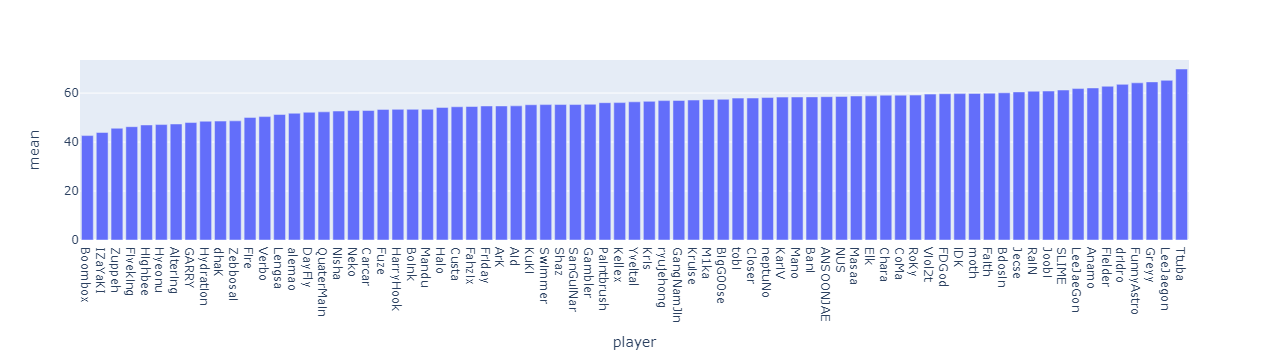

In [136]:
import plotly.express as px

winston = stat_df[stat_df['hero_Lúcio'] == 1].groupby('player')['Stat'].describe()[['count', 'mean']].reset_index()
winston = winston[winston['count'] > 0].sort_values(by='mean')

fig = px.bar(winston, x=winston.player, y=winston['mean'])
fig.show()

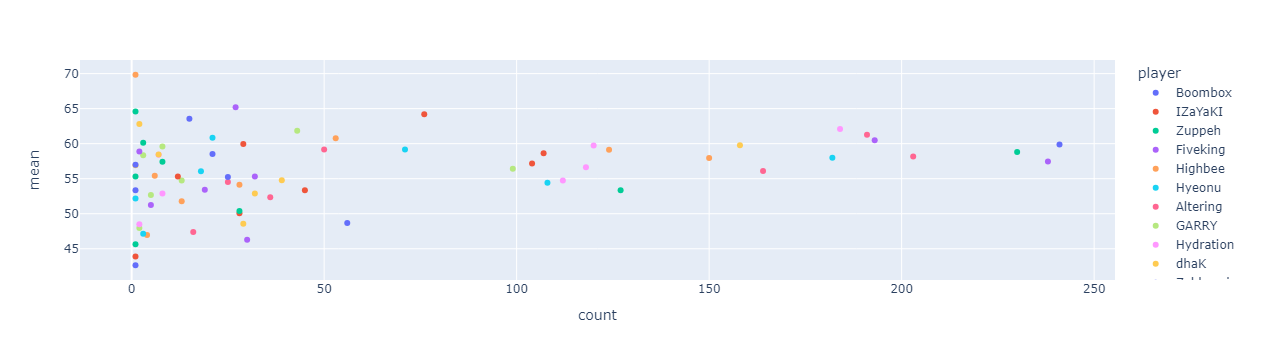

In [137]:
fig2 = px.scatter(winston, x=winston['count'], y=winston['mean'], color=winston['player'])
fig2.show()

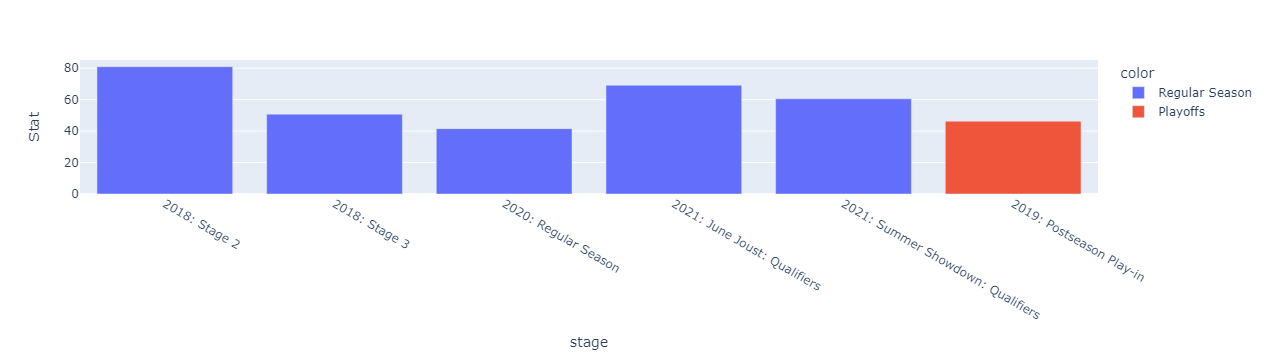

In [153]:
import plotly.express as px
#.groupby('match_id')['Stat'].mean().reset_index()

profit = stat_df
profit = profit[profit['player'] == 'Profit']
profit = profit[profit['hero_McCree'] == 1].groupby('stage')['Stat'].mean().reset_index()
color=np.array(['Regular Season']*profit.Stat.shape[0])
for i in playoffs:
    color[profit.stage==i] = 'Playoffs'

fig = px.bar(profit, x=profit.stage, y=profit.Stat, color=color)
fig.show()